In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

In [68]:
column_names=['rel_compact', 'surface_a', 'wall_a', 'roof_a', 'overall_height', 'orientation', \
             'glazing_area', 'glazing_area_dist', 'y1_heating_load', 'y2_cooling_load']
build = pd.read_csv('ENB2012_data.csv', header=0, names = column_names)

In [69]:
build.head()

,rel_compact,surface_a,wall_a,roof_a,overall_height,orientation,glazing_area,glazing_area_dist,y1_heating_load,y2_cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [70]:
build.orientation.unique()

array([2, 3, 4, 5])

In [71]:
build.overall_height.unique()

array([7. , 3.5])

From looking into the data and researching on the dependent variables, the following variables were found to be categorical and would need to be converted to categories. The variables in question are:
1. Orientation 
2. Glazing Area
3. Glazing Area Distribution 

In [72]:
# Converting orientation to str
build['orientation'] = build['orientation'].apply(str)
build['glazing_area'] = build['glazing_area'].apply(str)
build['glazing_area_dist'] = build['glazing_area_dist'].apply(str)

In [73]:
build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rel_compact        768 non-null    float64
 1   surface_a          768 non-null    float64
 2   wall_a             768 non-null    float64
 3   roof_a             768 non-null    float64
 4   overall_height     768 non-null    float64
 5   orientation        768 non-null    object 
 6   glazing_area       768 non-null    object 
 7   glazing_area_dist  768 non-null    object 
 8   y1_heating_load    768 non-null    float64
 9   y2_cooling_load    768 non-null    float64
dtypes: float64(7), object(3)
memory usage: 60.1+ KB


### Understanding the distribution of all variables

#### 1. Numeric variables

In [74]:
build.describe()

,rel_compact,surface_a,wall_a,roof_a,overall_height,y1_heating_load,y2_cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,43.100000,48.030000


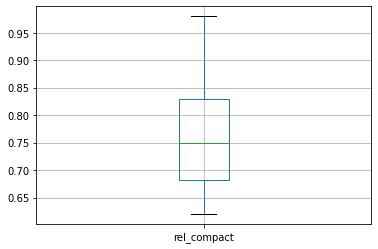

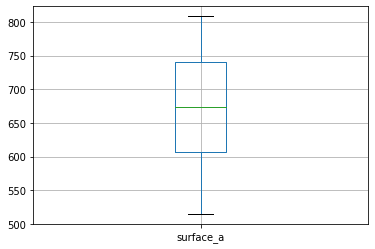

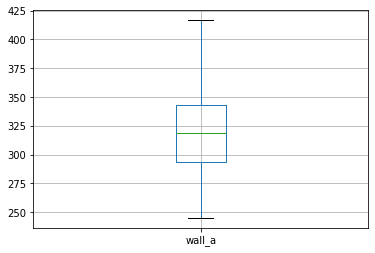

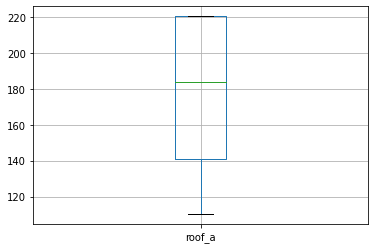

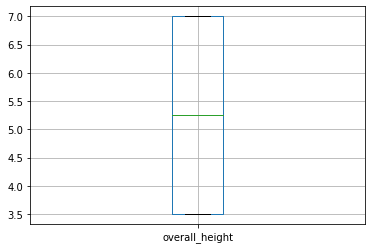

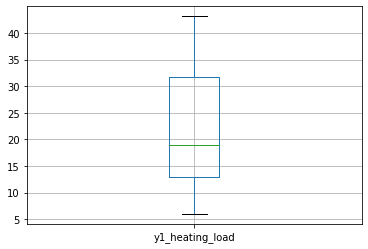

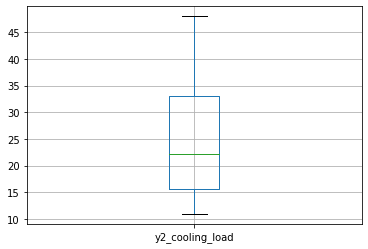

In [75]:
box_columns = ['rel_compact', 'surface_a', 'wall_a', 'roof_a', 'overall_height', 'y1_heating_load', 'y2_cooling_load']

for column in box_columns:
    plt.figure()
    build.boxplot([column])

#### 2. Categorical variables

##### Orientation

In [77]:
build.orientation.unique()

array(['2', '3', '4', '5'], dtype=object)

In [94]:
build.groupby('orientation').size().reset_index(name='count')

,orientation,count
0,2,192
1,3,192
2,4,192
3,5,192


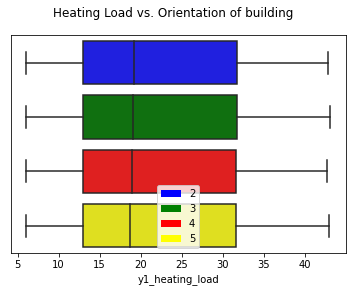

In [87]:
fig, ax = plt.subplots()

sns.boxplot(x="y1_heating_load", y="orientation", data=build, orient="h", \
            palette={'2':"blue", '3':"green", '4':'red', '5':'yellow'}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Heating Load vs. Orientation of building");

color_patches = [
    Patch(facecolor="blue", label="2"),
    Patch(facecolor="green", label="3"),
    Patch(facecolor="red", label="4"),
    Patch(facecolor="yellow", label="5")
]
ax.legend(handles=color_patches);


##### Glazing Area

In [88]:
build.glazing_area.unique()

array(['0.0', '0.1', '0.25', '0.4'], dtype=object)

In [91]:
build.groupby(['glazing_area']).size().reset_index(name='count')

,glazing_area,count
0,0.0,48
1,0.1,240
2,0.25,240
3,0.4,240


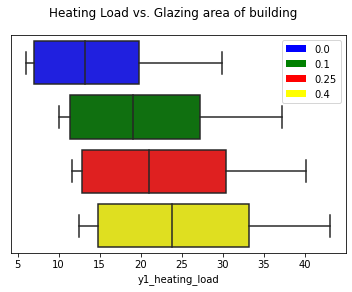

In [95]:
fig, ax = plt.subplots()

sns.boxplot(x="y1_heating_load", y="glazing_area", data=build, orient="h", \
            palette={'0.0':"blue", '0.1':"green", '0.25':'red', '0.4':'yellow'}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Heating Load vs. Glazing area of building");

color_patches = [
    Patch(facecolor="blue", label="0.0"),
    Patch(facecolor="green", label="0.1"),
    Patch(facecolor="red", label="0.25"),
    Patch(facecolor="yellow", label="0.4")
]
ax.legend(handles=color_patches);

##### Glazing Area distribution

In [96]:
build.glazing_area_dist.unique()

array(['0', '1', '2', '3', '4', '5'], dtype=object)

In [98]:
build.groupby('glazing_area_dist').size().reset_index(name='count')

,glazing_area_dist,count
0,0,48
1,1,144
2,2,144
3,3,144
4,4,144
5,5,144


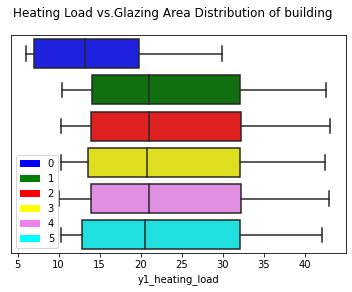

In [99]:
fig, ax = plt.subplots()

sns.boxplot(x="y1_heating_load", y="glazing_area_dist", data=build, orient="h", \
            palette={'0':"blue", '1':"green", '2':'red', '3':'yellow', '4':'violet', '5':'aqua'}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Heating Load vs.Glazing Area Distribution of building");

color_patches = [
    Patch(facecolor="blue", label="0"),
    Patch(facecolor="green", label="1"),
    Patch(facecolor="red", label="2"),
    Patch(facecolor="yellow", label="3"),
    Patch(facecolor="violet", label="4"),
    Patch(facecolor="aqua", label="5")
]
ax.legend(handles=color_patches);

### Correlation between numeric variables

In [26]:
build.corr()

,rel_compact,surface_a,wall_a,roof_a,overall_height,y1_heating_load,y2_cooling_load
rel_compact,1.000000,-0.991901,-0.203782,-0.868823,0.827747,0.622272,0.634339
surface_a,-0.991901,1.000000,0.195502,0.880720,-0.858148,-0.658120,-0.672999
wall_a,-0.203782,0.195502,1.000000,-0.292316,0.280976,0.455671,0.427117
roof_a,-0.868823,0.880720,-0.292316,1.000000,-0.972512,-0.861828,-0.862547
overall_height,0.827747,-0.858148,0.280976,-0.972512,1.000000,0.889431,0.895785
y1_heating_load,0.622272,-0.658120,0.455671,-0.861828,0.889431,1.000000,0.975862
y2_cooling_load,0.634339,-0.672999,0.427117,-0.862547,0.895785,0.975862,1.000000


### Observations from above correlation exercise

#### Independent variables
1. Relative compactness is highly positively correlated to height and highly negatively correlated to surface area, roof area.
2. Surface area and roof area are highly correlated.
3. Surface area is highly negatively correlated to overall height

#### Dependent variables
1. Heating load and cooling load are very correlated to each other. 
2. They show similar correlations to all the independent variables. 
3. They are both highly positively correlated to overall height and highly negatively correlated to roof area.
There is a possibility that increasing efficiency for one should provide efficiency for the other dependent variable.

In [ ]:
Recommendation:
    1. Different types of visualization. Correlation is just one way of looking at it.
    2. Three dimensional visuals

In [ ]:
# Appendix



# Variable(s) units:
# Relative Compactness
# Surface Area - m²
# Wall Area - m²
# Roof Area - m²
# Overall Height - m
# Orientation - 2:North, 3:East, 4:South, 5:West
# Glazing Area - 0%, 10%, 25%, 40% (of floor area)
# Glazing Area Distribution (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West
# Heating Load - kWh/m²
# Cooling Load - kWh/m²

# https://rstudio-pubs-static.s3.amazonaws.com/244473_5d13955ea0fd4e5e9d376161b956e9dc.html